In [1]:
%load_ext autoreload
%autoreload 2
import pdf_processor.form_creator as f_c
from smart_forms_types.models import *
import pdf2image
import matplotlib.pyplot as plt

In [ ]:
form = f_c.create_form_from_description(
    FormDescription(
        title="Form Title",
        description="Form description",
        canBeFilledOnline=False,
        needsToBeSignedInToSubmit=False,
        questions=[
            FormMultipleChoiceQuestion(
                title="Intrebare 1",
                description="question description",
                choices=[
                    "choice 1",
                    "choice 2"
                ]
            ),
            FormTextQuestion(
                title="Intrebare 2",
                description="",
                maxAnswerLength=2
            ),
            FormTextQuestion(
                title="",
                description="Descriere 2",
                maxAnswerLength=2
            ),
            FormTextQuestion(
                title="Intrebare 2",
                description="Descriere 2",
                maxAnswerLength=200
            ),
            FormTextQuestion(
                title="",
                description="",
                maxAnswerLength=2000
            )
        ]
    ),
    False
)

imgs = pdf2image.convert_from_bytes(form.extract_raw_pdf_bytes())

with open("file.pdf", "wb") as fout:
    fout.write(form.extract_raw_pdf_bytes())

for i in imgs:
    plt.figure(figsize=(15, 10))
    plt.imshow(i)
    plt.show()


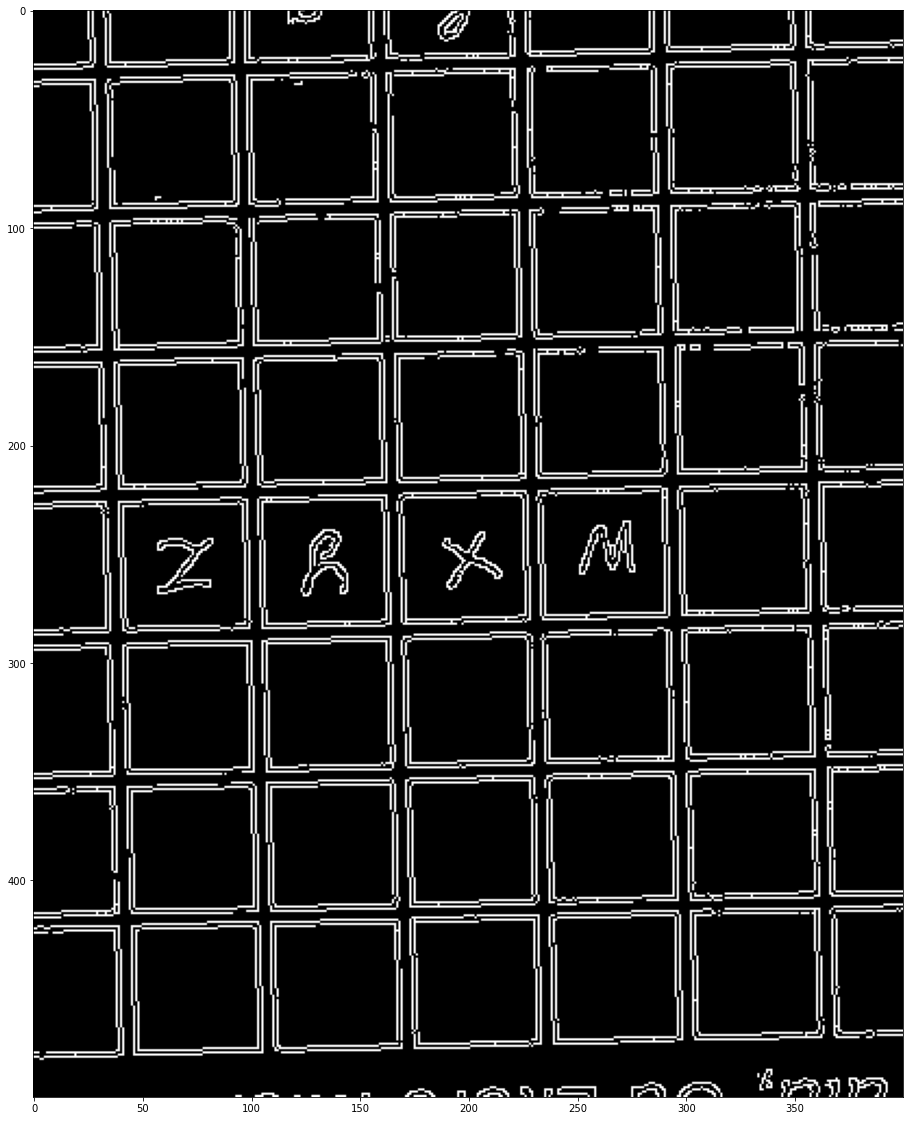

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

pdf = open("../data/scanned_form.pdf", "rb").read()
images = pdf2image.convert_from_bytes(pdf)
images = [np.array(i) for i in images]

img = images[0]

img = cv.bilateralFilter(img, 7, 50, 50)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# cols, rows = img.shape
# brightness = np.sum(img) / (255 * cols * rows)
# minimum_brightness = 0.80
# ratio = brightness / minimum_brightness

# print(ratio)
# img = cv.convertScaleAbs(img, alpha = 1 / brightness, beta = 0)

# print(img[0][0])

im2 = cv.Canny(img, 30, 60)

plt.figure(figsize=(25, 20))
plt.imshow(im2[500:1000, 600:1000], cmap="gray")
plt.show()

In [27]:
im2[1].shape

(1, 4401, 4)